In [3]:
import torch
print(torch.__version__)
print(torch.backends.mps.is_available())

# CUDA (NVIDIA GPUs) - won’t show anything on your Mac
print("CUDA available:", torch.cuda.is_available())
print("Number of CUDA GPUs:", torch.cuda.device_count())

# MPS (Apple Silicon GPUs)
print("MPS available:", torch.backends.mps.is_available())


2.4.1
True
CUDA available: False
Number of CUDA GPUs: 0
MPS available: True


In [4]:


# pick device automatically
device = (
    "cuda" if torch.cuda.is_available() else 
    "mps" if torch.backends.mps.is_available() else 
    "cpu"
)

print("Using device:", device)

# Example: create a tensor directly on device
x = torch.randn(3, 3, device=device)
print(x.device)


Using device: mps
mps:0


In [2]:

# create some tensors
x = torch.tensor([[1., 2.], [3., 4.]])
y = torch.ones((2, 2))

print("x:\n", x)
print("y:\n", y)
print("x + y:\n", x + y)   # element-wise add
print("x * y:\n", x * y)   # element-wise multiply
print("Matrix multiply x @ y^T:\n", x @ y.T)


x:
 tensor([[1., 2.],
        [3., 4.]])
y:
 tensor([[1., 1.],
        [1., 1.]])
x + y:
 tensor([[2., 3.],
        [4., 5.]])
x * y:
 tensor([[1., 2.],
        [3., 4.]])
Matrix multiply x @ y^T:
 tensor([[3., 3.],
        [7., 7.]])


In [5]:
# create a tensor with gradient tracking
x = torch.tensor(2.0, requires_grad=True)

# define a function: y = x^2 + 3x
y = x**2 + 3*x
print("y:", y.item())

# compute dy/dx using autograd
y.backward()

print("Gradient dy/dx at x=2:", x.grad.item())

y: 10.0
Gradient dy/dx at x=2: 7.0


In [6]:
y = x**3 + 5*x
print("y:", y.item())

# compute dy/dx using autograd
y.backward()

print("Gradient dy/dx at x=2:", x.grad.item())

y: 18.0
Gradient dy/dx at x=2: 24.0


In [7]:
x = torch.ones((3, 3), dtype=torch.float32, device="mps", requires_grad=True)
print(x)


tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], device='mps:0', requires_grad=True)


In [8]:


# two inputs, both require gradients
x1 = torch.tensor(2.0, requires_grad=True)
x2 = torch.tensor(3.0, requires_grad=True)

# function: y = 4*x1 + x2^2
y = 4*x1 + x2**2
print("y:", y.item())

# compute gradients
y.backward()

print("dy/dx1:", x1.grad.item())  # should be 4
print("dy/dx2:", x2.grad.item())  # should be 2*x2 = 6


y: 17.0
dy/dx1: 4.0
dy/dx2: 6.0


## Linear Regression

In [9]:
import torch.nn as nn

# Linear Regression: y = wx + b
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  # input_dim=1, output_dim=1

    def forward(self, x):
        return self.linear(x)

In [10]:
# training data
X = torch.linspace(0, 10, 100).unsqueeze(1)   # shape [100,1]
y = 2*X + 1 + 0.2*torch.randn(X.shape)        # add noise


In [11]:
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# training loop
for epoch in range(200):
    # forward pass
    y_pred = model(X)
    loss = criterion(y_pred, y)

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 50 == 0:
        print(f"Epoch {epoch+1}, Loss = {loss.item():.4f}")


Epoch 50, Loss = 0.0453
Epoch 100, Loss = 0.0433
Epoch 150, Loss = 0.0422
Epoch 200, Loss = 0.0414


In [12]:
for name, param in model.named_parameters():
    print(name, param.data)


linear.weight tensor([[2.0006]])
linear.bias tensor([0.9705])


# MLP

In [13]:
import torch, torch.nn as nn, torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# device pick (CUDA → MPS → CPU)
device = (
    "cuda" if torch.cuda.is_available() else
    "mps" if torch.backends.mps.is_available() else
    "cpu"
)
print("Using device:", device)

# Reproducibility
torch.manual_seed(42)


Using device: mps


In [14]:
# Normalize to mean=0.1307, std=0.3081: standard MNIST normalization
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_ds = datasets.MNIST(root="./data", train=True,  transform=transform, download=True)
test_ds  = datasets.MNIST(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True, num_workers=2, pin_memory=(device!="cpu"))
test_loader  = DataLoader(test_ds,  batch_size=512, shuffle=False, num_workers=2, pin_memory=(device!="cpu"))

len(train_ds), len(test_ds)


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:11<00:00, 891595.28it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 88903.41it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:04<00:00, 358778.57it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 6670353.21it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



(60000, 10000)

In [15]:
xb, yb = next(iter(train_loader))
print("xb shape:", xb.shape)      # [B, 1, 28, 28]
print("yb shape:", yb.shape)      # [B]
print("labels sample:", yb[:10].tolist())


xb shape: torch.Size([128, 1, 28, 28])
yb shape: torch.Size([128])
labels sample: [1, 2, 8, 5, 2, 6, 9, 9, 9, 4]


In [28]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(),           # 1×28×28 → 784
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10)      # logits
        )
    def forward(self, x):
        return self.net(x)

model = MLP().to(device)
sum(p.numel() for p in model.parameters()), model


(235146,
 MLP(
   (net): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=256, bias=True)
     (2): ReLU()
     (3): Linear(in_features=256, out_features=128, bias=True)
     (4): ReLU()
     (5): Linear(in_features=128, out_features=10, bias=True)
   )
 ))

In [29]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()


In [30]:
def accuracy(logits, targets):
    return (logits.argmax(dim=1) == targets).float().mean().item()

def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    total_loss, total_acc, n = 0.0, 0.0, 0
    for xb, yb in loader:
        xb = xb.to(device, non_blocking=True)
        yb = yb.to(device, non_blocking=True)

        logits = model(xb)
        loss = criterion(logits, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        b = yb.size(0)
        total_loss += loss.item() * b
        total_acc  += accuracy(logits, yb) * b
        n += b
    return total_loss / n, total_acc / n

@torch.no_grad()
def evaluate(model, loader, criterion, device):
    model.eval()
    total_loss, total_acc, n = 0.0, 0.0, 0
    for xb, yb in loader:
        xb = xb.to(device, non_blocking=True)
        yb = yb.to(device, non_blocking=True)
        logits = model(xb)
        loss = criterion(logits, yb)
        b = yb.size(0)
        total_loss += loss.item() * b
        total_acc  += accuracy(logits, yb) * b
        n += b
    return total_loss / n, total_acc / n
train_losses, test_losses = [], []
train_accs, test_accs = [], []

for epoch in range(1, 6):
    tr_loss, tr_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
    te_loss, te_acc = evaluate(model, test_loader, criterion, device)

    train_losses.append(tr_loss)
    test_losses.append(te_loss)
    train_accs.append(tr_acc)
    test_accs.append(te_acc)

    print(f"Epoch {epoch} | train acc {tr_acc:.3f} | test acc {te_acc:.3f}")



Epoch 1 | train acc 0.902 | test acc 0.948
Epoch 2 | train acc 0.963 | test acc 0.969
Epoch 3 | train acc 0.975 | test acc 0.973
Epoch 4 | train acc 0.981 | test acc 0.976
Epoch 5 | train acc 0.986 | test acc 0.977


In [31]:
ckpt_path = "mnist_mlp.pt"
torch.save({"model_state": model.state_dict()}, ckpt_path)

# reload example
model2 = MLP().to(device)
state = torch.load(ckpt_path, map_location=device)
model2.load_state_dict(state["model_state"])


/var/folders/67/xz_9t3_s7351ym509w5s01z00000gn/T/ipykernel_73530/3286360440.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(ckpt_path, map_location=de

<All keys matched successfully>

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_curves(train_loss, test_loss, train_acc, test_acc):
    epochs = range(1, len(train_loss) + 1)
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    # Loss plot
    ax[0].plot(epochs, train_loss, marker="o", label="Train Loss")
    ax[0].plot(epochs, test_loss, marker="s", label="Test Loss")
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Loss")
    ax[0].set_title("Loss over Epochs")
    ax[0].legend()
    ax[0].grid(True, linestyle="--", alpha=0.6)

    # Accuracy plot
    ax[1].plot(epochs, train_acc, marker="o", label="Train Accuracy")
    ax[1].plot(epochs, test_acc, marker="s", label="Test Accuracy")
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Accuracy")
    ax[1].set_title("Accuracy over Epochs")
    ax[1].legend()
    ax[1].grid(True, linestyle="--", alpha=0.6)

    plt.show()


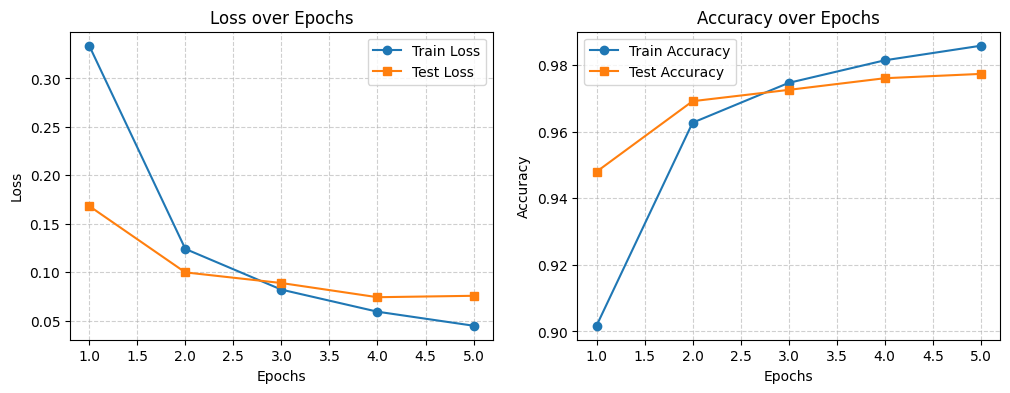

In [33]:
plot_curves(train_losses, test_losses, train_accs, test_accs)


In [20]:
@torch.no_grad()
def predict_samples(model, loader, k=8):
    model.eval()
    xb, yb = next(iter(loader))
    xb, yb = xb.to(device), yb.to(device)
    logits = model(xb[:k])
    preds = logits.argmax(1).tolist()
    truths = yb[:k].tolist()
    return list(zip(truths, preds))

predict_samples(model, test_loader, k=10)


[(7, 7),
 (2, 2),
 (1, 1),
 (0, 0),
 (4, 4),
 (1, 1),
 (4, 4),
 (9, 9),
 (5, 5),
 (9, 9)]

## MLP With Dropout and Increased Batch Size

In [34]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(),                   # 1×28×28 → 784
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Dropout(p=0.20),            # NEW
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(p=0.20),            # NEW
            nn.Linear(128, 10)             # logits
        )
    def forward(self, x):
        return self.net(x)


In [35]:
model = MLP().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)  # NEW
criterion = nn.CrossEntropyLoss()


In [36]:
train_loader = DataLoader(train_ds, batch_size=256, shuffle=True, num_workers=2, pin_memory=(device!="cpu"))
test_loader  = DataLoader(test_ds,  batch_size=1024, shuffle=False, num_workers=2, pin_memory=(device!="cpu"))


In [37]:
def accuracy(logits, targets):
    return (logits.argmax(dim=1) == targets).float().mean().item()

def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    total_loss, total_acc, n = 0.0, 0.0, 0
    for xb, yb in loader:
        xb = xb.to(device, non_blocking=True)
        yb = yb.to(device, non_blocking=True)

        logits = model(xb)
        loss = criterion(logits, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        b = yb.size(0)
        total_loss += loss.item() * b
        total_acc  += accuracy(logits, yb) * b
        n += b
    return total_loss / n, total_acc / n

@torch.no_grad()
def evaluate(model, loader, criterion, device):
    model.eval()
    total_loss, total_acc, n = 0.0, 0.0, 0
    for xb, yb in loader:
        xb = xb.to(device, non_blocking=True)
        yb = yb.to(device, non_blocking=True)
        logits = model(xb)
        loss = criterion(logits, yb)
        b = yb.size(0)
        total_loss += loss.item() * b
        total_acc  += accuracy(logits, yb) * b
        n += b
    return total_loss / n, total_acc / n

for epoch in range(1, 6):
    tr_loss, tr_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
    te_loss, te_acc = evaluate(model, test_loader, criterion, device)

    train_losses.append(tr_loss)
    test_losses.append(te_loss)
    train_accs.append(tr_acc)
    test_accs.append(te_acc)

    print(f"Epoch {epoch} | train acc {tr_acc:.3f} | test acc {te_acc:.3f}")


Epoch 1 | train acc 0.889 | test acc 0.953
Epoch 2 | train acc 0.955 | test acc 0.969
Epoch 3 | train acc 0.967 | test acc 0.970
Epoch 4 | train acc 0.973 | test acc 0.977
Epoch 5 | train acc 0.977 | test acc 0.976


In [38]:
ckpt_path_2 = "mnist_mlp_2.pt"
torch.save({"model_state": model.state_dict()}, ckpt_path_2)

# reload example
model2 = MLP().to(device)
state = torch.load(ckpt_path_2, map_location=device)
model2.load_state_dict(state["model_state"])


/var/folders/67/xz_9t3_s7351ym509w5s01z00000gn/T/ipykernel_73530/2666982437.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(ckpt_path_2, map_location=

<All keys matched successfully>

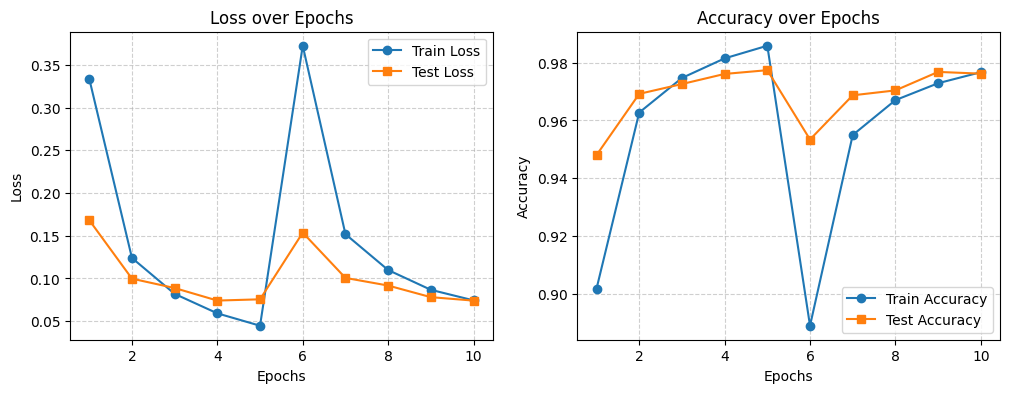

In [39]:
plot_curves(train_losses, test_losses, train_accs, test_accs)


In [26]:
@torch.no_grad()
def predict_samples(model, loader, k=8):
    model.eval()
    xb, yb = next(iter(loader))
    xb, yb = xb.to(device), yb.to(device)
    logits = model(xb[:k])
    preds = logits.argmax(1).tolist()
    truths = yb[:k].tolist()
    return list(zip(truths, preds))

predict_samples(model2, test_loader, k=10)


[(7, 7),
 (2, 2),
 (1, 1),
 (0, 0),
 (4, 4),
 (1, 1),
 (4, 4),
 (9, 9),
 (5, 5),
 (9, 9)]